In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [4]:
train = pd.read_csv("train_s3TEQDk.csv")
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
tr = train.drop(["Region_Code"],axis = 1)
tr.head()

,ID,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,Salaried,X1,33,No,886787,No,0


In [6]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       216400 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.7+ MB


In [7]:
tr['Credit_Product'].fillna(tr['Credit_Product'].mode()[0], inplace = True)

In [8]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       245725 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.7+ MB


In [9]:
le = LabelEncoder()
tr['Occupation'] = le.fit_transform(tr['Occupation'])

In [10]:
le = LabelEncoder()
tr['Gender'] = le.fit_transform(tr['Gender'])

In [11]:
le = LabelEncoder()
tr['Is_Active'] = le.fit_transform(tr['Is_Active'])

In [12]:
le = LabelEncoder()
tr['Channel_Code'] = le.fit_transform(tr['Channel_Code'])

In [13]:
le = LabelEncoder()
tr['Credit_Product'] = le.fit_transform(tr['Credit_Product'])

In [14]:
le = LabelEncoder()
tr['ID'] = le.fit_transform(tr['ID'])

In [15]:
tr.head()

,ID,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,179194,0,73,1,2,43,0,1045696,0,0
1,131013,0,30,2,0,32,0,581988,0,0
2,121520,0,56,3,2,26,0,1484315,1,0
3,57273,1,34,2,0,19,0,470454,0,0
4,209602,0,30,2,0,33,0,886787,0,0


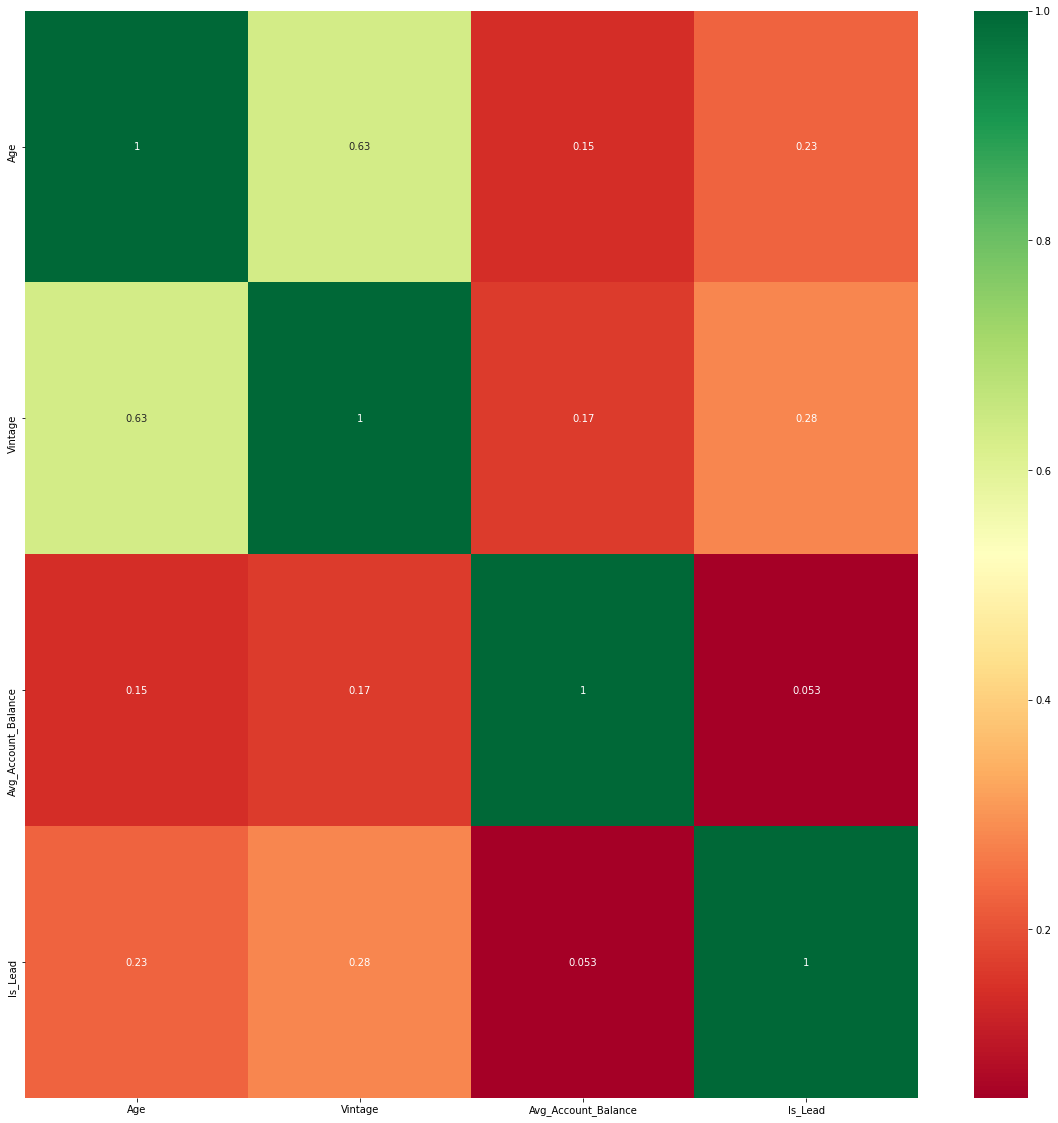

In [16]:
X = tr.drop(['Is_Lead'],axis=1)                     #independent columns
y = tr['Is_Lead'] 
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")                                  #target column i.e price range


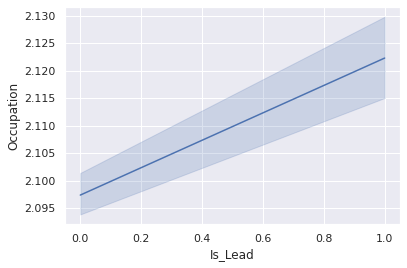

In [17]:
sns.set(style='darkgrid')
sns.lineplot(x = 'Is_Lead', y = 'Occupation', data = tr);
#plt.text (x= 4, y=4 , s = "Is_Lead",fontsize = 10, weight = 'bold');


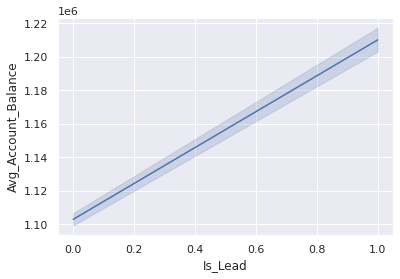

In [18]:
sns.set(style='darkgrid')
sns.lineplot(x = 'Is_Lead', y = 'Avg_Account_Balance', data = tr);
#plt.text (x= 4, y=4000000 , s = "Is_Lead",fontsize = 30, weight = 'bold');


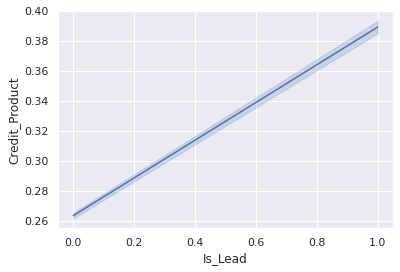

In [19]:
sns.set(style='darkgrid')
sns.lineplot(x = 'Is_Lead', y = 'Credit_Product', data = tr);
#plt.text (x= 4, y=2 , s = "Is_Lead",fontsize = 30, weight = 'bold');


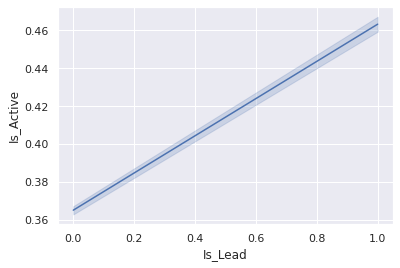

In [20]:
sns.set(style='darkgrid')
sns.lineplot(x = 'Is_Lead', y = 'Is_Active', data = tr);
#plt.text (x= 4, y = 2 , s = "Is_Lead",fontsize = 30, weight = 'bold');


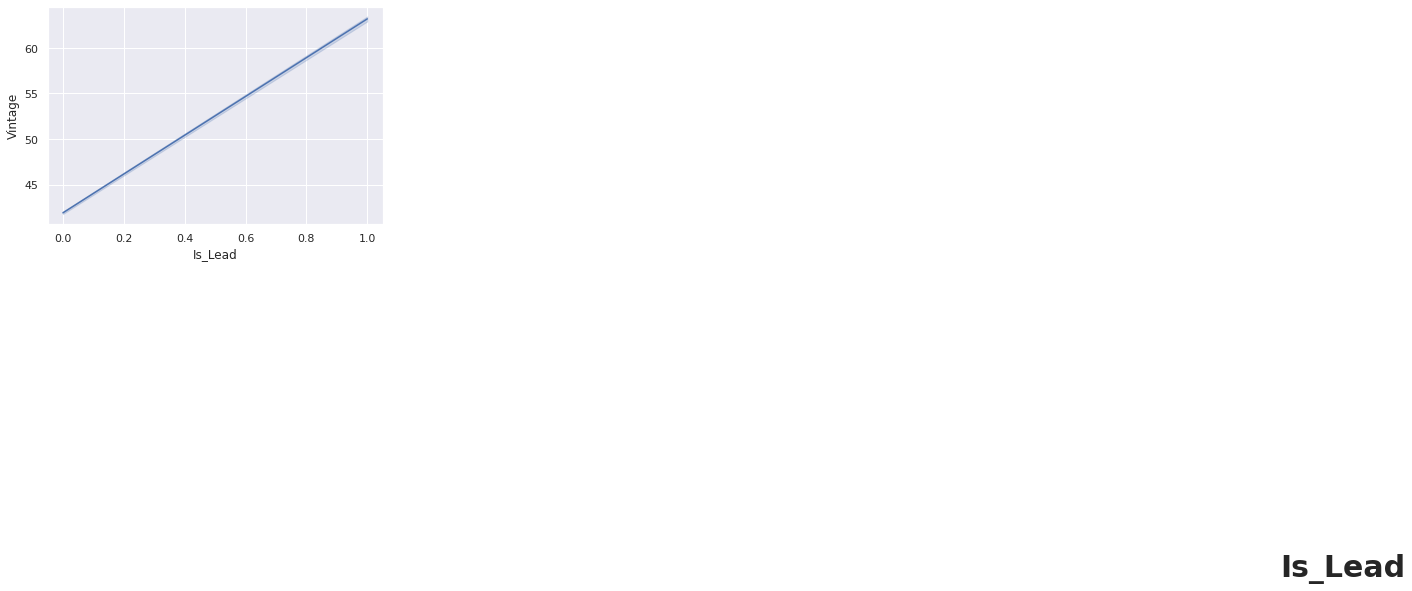

In [21]:
sns.set(style='darkgrid')
sns.lineplot(x = 'Is_Lead', y = 'Vintage', data = tr);
plt.text (x= 4, y=2 , s = "Is_Lead",fontsize = 30, weight = 'bold');


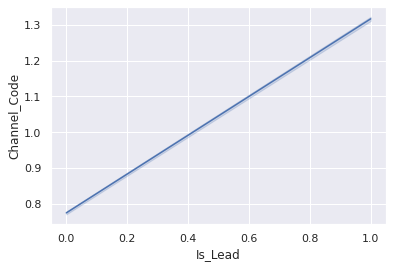

In [22]:
sns.set(style='darkgrid')
sns.lineplot(x = 'Is_Lead', y = 'Channel_Code', data = tr);
#plt.text (x= 4, y= 4 , s = "Is_Lead",fontsize = 30, weight = 'bold');


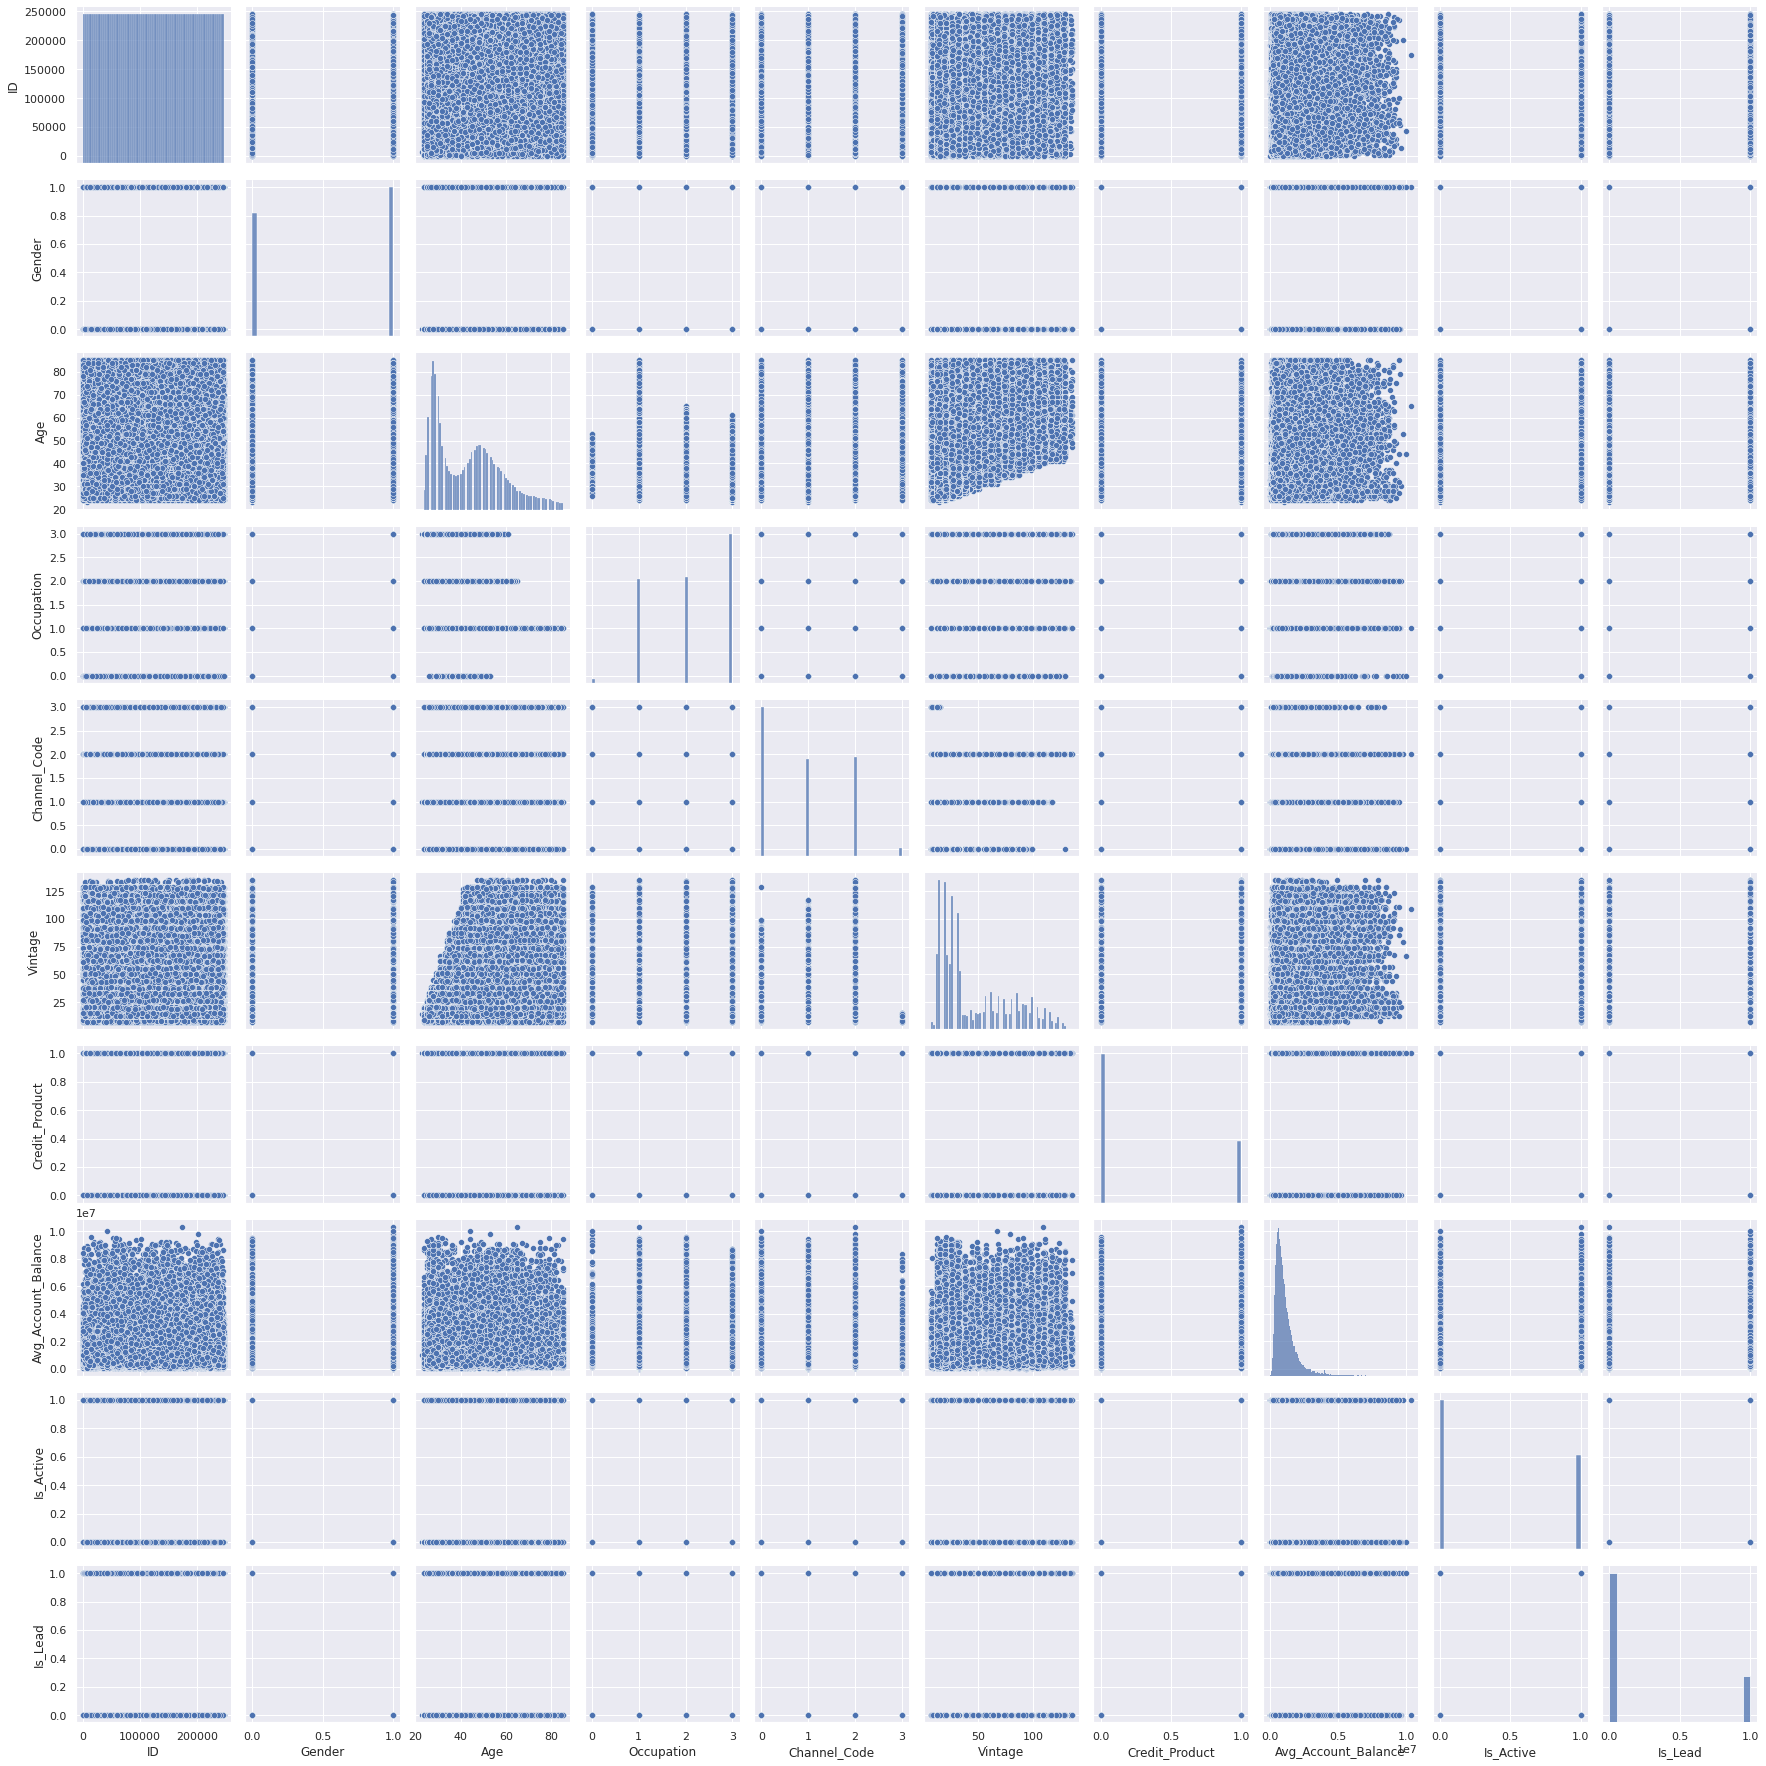

In [23]:
sns.pairplot(tr)

In [24]:
print(tr.shape)

(245725, 10)


In [25]:
tr.keys()

Index(['ID', 'Gender', 'Age', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead'],
      dtype='object')

In [26]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   ID                   245725 non-null  int64
 1   Gender               245725 non-null  int64
 2   Age                  245725 non-null  int64
 3   Occupation           245725 non-null  int64
 4   Channel_Code         245725 non-null  int64
 5   Vintage              245725 non-null  int64
 6   Credit_Product       245725 non-null  int64
 7   Avg_Account_Balance  245725 non-null  int64
 8   Is_Active            245725 non-null  int64
 9   Is_Lead              245725 non-null  int64
dtypes: int64(10)
memory usage: 18.7 MB


In [27]:
tr.dtypes

ID                     int64
Gender                 int64
Age                    int64
Occupation             int64
Channel_Code           int64
Vintage                int64
Credit_Product         int64
Avg_Account_Balance    int64
Is_Active              int64
Is_Lead                int64
dtype: object

In [28]:
x = tr.drop(["Is_Lead","Channel_Code","Age","Gender"],axis = 1)
x.head()

,ID,Occupation,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,179194,1,43,0,1045696,0
1,131013,2,32,0,581988,0
2,121520,3,26,0,1484315,1
3,57273,2,19,0,470454,0
4,209602,2,33,0,886787,0


In [29]:
Label = tr['Is_Lead']
Label.head()

0    0
1    0
2    0
3    0
4    0
Name: Is_Lead, dtype: int64

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,Label,random_state=4,test_size=0.2)

In [31]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
from sklearn.metrics import mean_squared_error
predict=lr.predict(x_test)
mean_squared_error(predict,y_test)

0.1649231313457742

In [33]:
acc=lr.score(x_test,y_test)*100
print("Accuracy of the Model is = ", acc ,"%")


Accuracy of the Model is =  8.6815192335433 %


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [35]:
x_test.columns

Index(['ID', 'Occupation', 'Vintage', 'Credit_Product', 'Avg_Account_Balance',
       'Is_Active'],
      dtype='object')

In [36]:
knn.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)



KNeighborsClassifier(n_neighbors=10)

In [38]:
knn_predict=knn.predict(x_test)
print("Accuracy of Model is :" , knn.score(x_test,y_test)*100,"%")
print("Mean Square Error is :" , mean_squared_error(knn_predict,y_test)*100 ,"%")


Accuracy of Model is : 75.54176416726015 %
Mean Square Error is : 24.458235832739852 %


In [39]:
test = pd.read_csv("test_mSzZ8RL.csv")
test.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
5,MZZAQMPT,Male,60,RG268,Self_Employed,X3,110,No,4624262,No
6,Y88TW36I,Female,69,RG253,Other,X2,67,No,1032764,No
7,3UGOAQNU,Female,30,RG257,Salaried,X1,33,No,837009,No
8,VVUKMUJT,Male,43,RG284,Salaried,X3,81,NaN,1001232,Yes
9,9R363ZXS,Female,54,RG283,Self_Employed,X2,37,Yes,1667851,No


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [99]:
ts = test.drop(["Region_Code"],axis = 1)
ts.head()

,ID,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,Other,X1,19,No,657087,No


In [100]:
ts['Credit_Product'].fillna(ts['Credit_Product'].mode()[0], inplace = True)

In [101]:
le = LabelEncoder()
ts['Occupation'] = le.fit_transform(ts['Occupation'])

In [102]:
le = LabelEncoder()
ts['Gender'] = le.fit_transform(ts['Gender'])

In [103]:
le = LabelEncoder()
ts['Is_Active'] = le.fit_transform(ts['Is_Active'])

In [104]:
le = LabelEncoder()
ts['Channel_Code'] = le.fit_transform(ts['Channel_Code'])

In [105]:
le = LabelEncoder()
ts['Credit_Product'] = le.fit_transform(ts['Credit_Product'])

In [51]:
le = LabelEncoder()
ts['ID'] = le.fit_transform(ts['ID'])

In [106]:
tr.keys()

Index(['ID', 'Gender', 'Age', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead'],
      dtype='object')

In [107]:
tr.shape

(245725, 10)

In [108]:
ts.keys()

Index(['ID', 'Gender', 'Age', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active'],
      dtype='object')

In [109]:
ts.drop(["Gender",'Age','Channel_Code'],1,inplace =True)

In [110]:
ts.shape

(105312, 6)

In [111]:
x_test.columns

Index(['ID', 'Occupation', 'Vintage', 'Credit_Product', 'Avg_Account_Balance',
       'Is_Active'],
      dtype='object')

In [112]:
test_predict=knn.predict(ts)
test_predict

ValueError: could not convert string to float: 'VBENBARO'

In [114]:
ts["Is_Lead"] = test_predict
ts

,ID,Occupation,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,VBENBARO,1,25,1,742366,0,0
1,CCMEWNKY,1,49,0,925537,0,0
2,VK3KGA9M,2,14,0,215949,0,0
3,TT8RPZVC,1,33,0,868070,0,0
4,SHQZEYTZ,1,19,0,657087,0,0
...,...,...,...,...,...,...,...
105307,DBENJOYI,2,86,1,4242558,1,0
105308,CWQ72DWS,1,86,1,1159153,0,0
105309,HDESC8GU,2,15,0,1703727,0,0
105310,2PW4SFCA,1,93,0,737178,1,0


In [115]:

ts[]

,ID,Occupation,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,VBENBARO,1,25,1,742366,0,0
1,CCMEWNKY,1,49,0,925537,0,0
2,VK3KGA9M,2,14,0,215949,0,0
3,TT8RPZVC,1,33,0,868070,0,0
4,SHQZEYTZ,1,19,0,657087,0,0
...,...,...,...,...,...,...,...
105307,DBENJOYI,2,86,1,4242558,1,0
105308,CWQ72DWS,1,86,1,1159153,0,0
105309,HDESC8GU,2,15,0,1703727,0,0
105310,2PW4SFCA,1,93,0,737178,1,0


In [120]:
ts.to_csv("finalsubmission.csv")

In [118]:
ts["Is_Lead"].Unique()

AttributeError: 'Series' object has no attribute 'Unique'

In [80]:
df = pd.read_csv("submission.csv")

In [81]:
df.head()

,Unnamed: 0,ID,Is_Lead
0,0,94233,0
1,1,28747,0
2,2,94883,0
3,3,90941,0
4,4,87803,0


In [84]:
test = test = pd.read_csv("test_mSzZ8RL.csv")
test.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
5,MZZAQMPT,Male,60,RG268,Self_Employed,X3,110,No,4624262,No
6,Y88TW36I,Female,69,RG253,Other,X2,67,No,1032764,No
7,3UGOAQNU,Female,30,RG257,Salaried,X1,33,No,837009,No
8,VVUKMUJT,Male,43,RG284,Salaried,X3,81,NaN,1001232,Yes
9,9R363ZXS,Female,54,RG283,Self_Employed,X2,37,Yes,1667851,No


In [90]:
submission = pd.concat([test,ts])

In [91]:
submission.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,VBENBARO,Male,29.0,RG254,Other,X1,25.0,Yes,742366.0,No,NaN
1,CCMEWNKY,Male,43.0,RG268,Other,X2,49.0,NaN,925537.0,No,NaN
2,VK3KGA9M,Male,31.0,RG270,Salaried,X1,14.0,No,215949.0,No,NaN
3,TT8RPZVC,Male,29.0,RG272,Other,X1,33.0,No,868070.0,No,NaN
4,SHQZEYTZ,Female,29.0,RG270,Other,X1,19.0,No,657087.0,No,NaN


In [92]:
test.to_csv("submission1.csv")

In [93]:
ts = pd.read_csv("/home/daksh/Downloads/submission1.csv")

In [94]:
TT = pd.read_csv("/home/daksh/Downloads/submission.csv")

In [95]:
submission = pd.concat([TT,ts])

In [96]:
submission.head()

,Is_Lead,ID,Is_lead
0,0.0,NaN,NaN
1,0.0,NaN,NaN
2,0.0,NaN,NaN
3,0.0,NaN,NaN
4,0.0,NaN,NaN


In [98]:
test["ts"] = ts

ValueError: Wrong number of items passed 2, placement implies 1